In [1]:
# Задание 1
# Импортируйте библиотеки pandas, numpy и matplotlib.
# Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
# Создайте датафреймы X и y из этих данных.
# Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
# с помощью функции train_test_split так, чтобы размер тестовой выборки
# составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
# Масштабируйте данные с помощью StandardScaler.
# Постройте модель TSNE на тренировочный данных с параметрами:
# n_components=2, learning_rate=250, random_state=42.
# Постройте диаграмму рассеяния на этих данных.



In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_boston

In [154]:
boston = load_boston()

In [155]:
X = pd.DataFrame(boston['data'], columns = boston['feature_names'])
y = pd.DataFrame(boston['target'], columns = ['price'])

In [156]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [157]:
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [158]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [159]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
price    506 non-null float64
dtypes: float64(1)
memory usage: 4.0 KB


In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [161]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

In [162]:
# Масштабируйте данные с помощью StandardScaler.
# Постройте модель TSNE на тренировочный данных с параметрами:
# n_components=2, learning_rate=250, random_state=42.
# Постройте диаграмму рассеяния на этих данных.

In [163]:
from sklearn.preprocessing import StandardScaler

In [164]:
scaler = StandardScaler()

In [165]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns = X.columns)

In [166]:
X_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 13 columns):
CRIM       102 non-null float64
ZN         102 non-null float64
INDUS      102 non-null float64
CHAS       102 non-null float64
NOX        102 non-null float64
RM         102 non-null float64
AGE        102 non-null float64
DIS        102 non-null float64
RAD        102 non-null float64
TAX        102 non-null float64
PTRATIO    102 non-null float64
B          102 non-null float64
LSTAT      102 non-null float64
dtypes: float64(13)
memory usage: 10.4 KB


In [167]:
from sklearn.manifold import TSNE

In [168]:
model = TSNE(n_components = 2, learning_rate=250, random_state=42)

In [169]:
X_train_tsne = model.fit_transform(X_train_scaled)

In [170]:
X_train.shape
X_train_tsne.shape

(404, 2)

In [171]:
X_train_tsne;

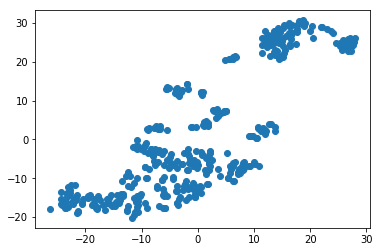

In [172]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1] )
plt.show()

In [173]:
# Задание 2
# С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
# используйте все признаки из датафрейма X_train.
# Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
# Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
# и раскрасьте точки из разных кластеров разными цветами.
# Вычислите средние значения price и CRIM в разных кластерах.


In [174]:
from sklearn.cluster import KMeans

In [175]:
model_KMeans = KMeans(max_iter = 3, random_state = 42, n_clusters = 3)

In [176]:
KMeans?

In [177]:
labels_train = model_KMeans.fit_predict(X_train_scaled)

In [178]:
len(X_train_tsne)

404

In [179]:
labels_train;

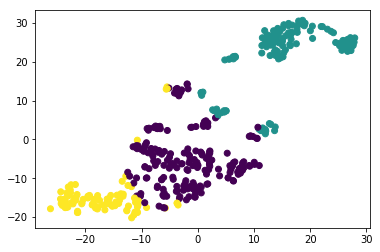

In [180]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c = labels_train)

In [181]:
# Вычислите средние значения price и CRIM в разных кластерах.

In [182]:
X_train['cluster'] = labels_train
y_train['cluster'] = labels_train

In [183]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,cluster
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91,1
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47,0
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83,2
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29,1
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28,0


In [184]:
y_train.head()

,price,cluster
477,12.0,1
15,19.9,0
332,19.4,2
423,13.4,1
19,18.2,0


In [185]:
print(X_train[X_train['cluster'] == 0]['CRIM'].mean(),
y_train[y_train['cluster'] == 0]['price'].mean())

0.42098554973821994 24.971204188481675


In [186]:
print(X_train[X_train['cluster'] == 1]['CRIM'].mean(),
y_train[y_train['cluster'] == 1]['price'].mean())

10.7152190625 16.1796875


In [187]:
print(X_train[X_train['cluster'] == 2]['CRIM'].mean(),
y_train[y_train['cluster'] == 2]['price'].mean())

0.0721184705882353 27.87411764705882


In [188]:

# * Задание 3
# Примените модель KMeans, построенную в предыдущем задании,
# к данным из тестового набора.
# Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.




In [189]:
labels_test = model_KMeans.predict(X_test_scaled)

In [191]:
labels_test;

In [192]:
print(X_test[labels_test == 0]['CRIM'].mean(), y_test[labels_test == 0]['price'].mean())

0.27973608695652175 21.926086956521743


In [194]:
print(X_test[labels_test == 1]['CRIM'].mean(), y_test[labels_test == 1]['price'].mean())

10.165531142857143 16.43714285714286


In [195]:
print(X_test[labels_test == 2]['CRIM'].mean(), y_test[labels_test == 2]['price'].mean())

0.08072 28.947619047619046
